In [ ]:
# I missed most of the teaching part of class and most of the group work because I got pulled out for resume talk. I am grateful to 
#the ladies of the group I only spent a few minutes with for sharing their code in slack so I could see some of what I missed. Hopefully
#I can watch the part of the class I missed to get a better grasp. 

#They were kind enough to share the code for the second question and I'm just not sure I would have gotten there. Is there an easier way? 


In [3]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop(['Outcome','BloodPressure', 'SkinThickness'], axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [28]:

# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 4,random_state=42)

In [29]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[87 13]
 [16 38]]


In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       100
           1       0.75      0.70      0.72        54

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



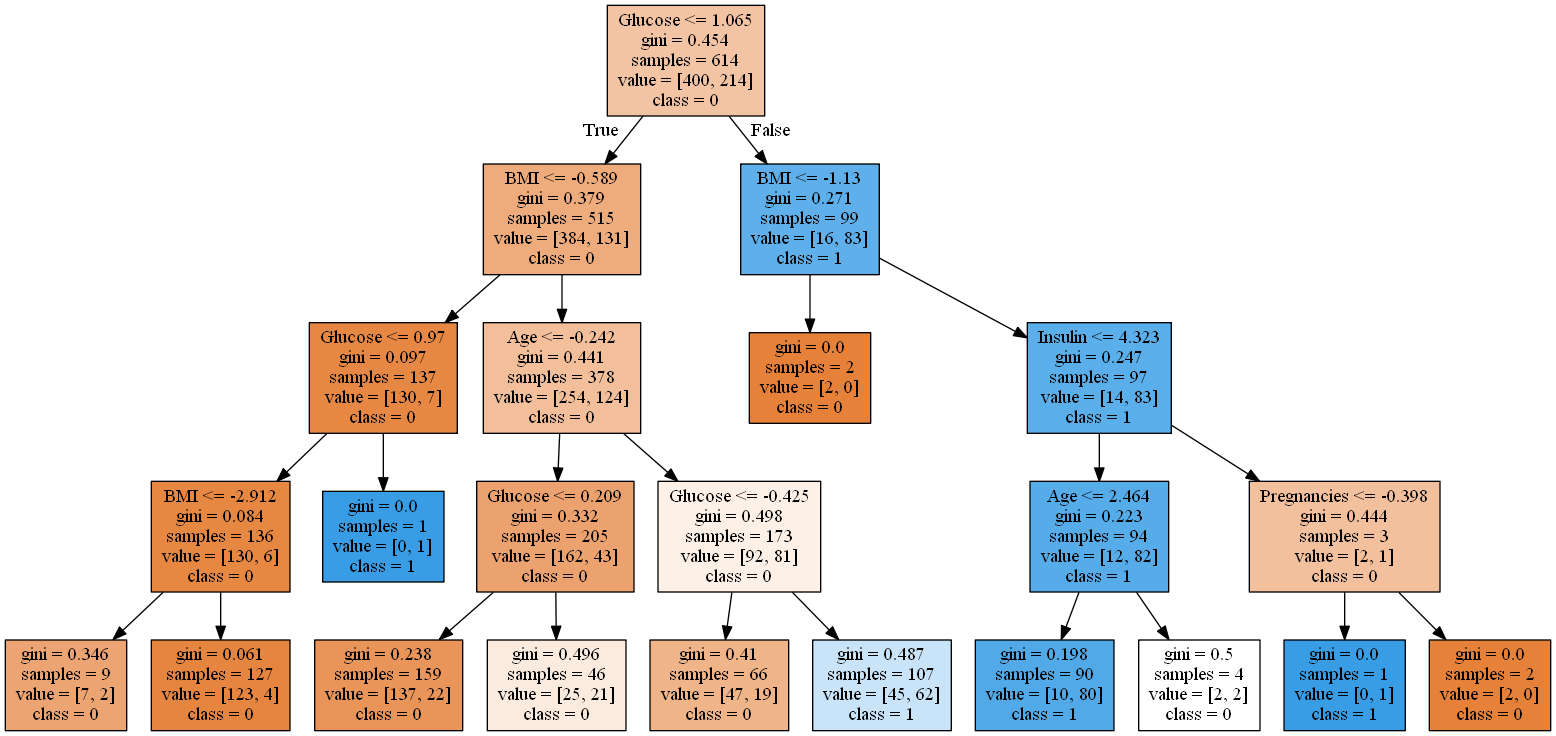

In [32]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)
Example input: [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ] Example output: Nichole, Tanisha & Maggie

In [44]:
#Amanda shared her code so I'm going through trying to analyze what she did on each line. 

def newNames(names):

    newList = list(map(lambda d : d['name'], names)) #lambda function returns the names in the dictionary
    if len(newList) == 1: #if the length of the list is 1
        return newList[0] #, then return only the name in index 0 which should be the only name there
    if len(newList) == 2: # if the length of the list is 2
        return newList[0] + ' & ' + newList[1] #return the names in index 0 and 1 separated by an '&'
    newString = '' # define new string as empty
    counter = len(newList) # define our counter as the length of our list
    for i in range(counter-2): # for loop iterating through the range of counter minus 2
        newString += newList[i] + ', '  #update newstring to add the index of newList plus a comma
    newString += newList[counter-2] + ' & ' + newList[counter-1] #the previously empty newString becomes our list of names with
                                            #commas and then add an ampersand and then our final name. 
    
    return newString


In [45]:
original =  [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]
print(newNames(original))

names = [{'name': 'onename'}, {'name': 'twoname'}]
print(newNames(names))

print(newNames([{'name': 'onename'}]))

combined =  [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}, 
         {'name': 'onename'}, {'name': 'twoname'} ]
print(newNames(combined))

Nichole, Tanisha & Maggie
onename & twoname
onename
Nichole, Tanisha, Maggie, onename & twoname
